# LAB 4 - ADVISE FOR APPLYING ML

## Model Evaluation

This Python script evaluates the impact of different data split sizes on **regression** and **classification** model performance. It generates synthetic regression and classification datasets and then splits them into training, validation, and test sets with three configurations: **80%-10%-10%**, **70%-15%-15%**, and **60%-20%-20%**, and an additional **50%-25%-25%** split to observe the effect of reducing training data further. For regression, it trains a Linear Regression model and measures **Root Mean Squared Error (RMSE)** across all splits. For classification, it uses a Logistic Regression model and evaluates accuracy on each dataset split. The results are stored in a DataFrame, and bar charts visualize how RMSE and accuracy change as more data is allocated to the validation and test sets. The findings highlight that larger training sets (e.g., 80%) lead to better learning, while larger test sets (e.g., 50%) allow better generalization evaluation but may reduce model learning capability due to limited training data. This script provides a clear comparison of different split strategies, helping users determine the optimal data allocation for better model performance.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Logistic iki Regression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.datasets import make_classification, make_regression

# ---- Generate Sample Regression and Classification Datasets ----
X_reg, y_reg = make_regression(n_samples=5000, n_features=2, noise=10, random_state=42)
X_clf, y_clf = make_classification(n_samples=5000, n_features=2, n_informative=2,
                                   n_redundant=0, n_classes=2, random_state=42)

# ---- Function to Split Data ----
def split_data(X, y, train_size, val_size):
    test_size = 1 - (train_size + val_size)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_size), random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_size / (val_size + test_size)), random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# ---- Evaluate Regression Model (Linear Regression) ----
def evaluate_regression(X_train, X_val, X_test, y_train, y_val, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred) * 0.5)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred) * 0.5)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred) * 0.5)

    return train_rmse, val_rmse, test_rmse

# ---- Evaluate Classification Model (Logistic Regression) ----
def evaluate_classification(X_train, X_val, X_test, y_train, y_val, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    return train_acc, val_acc, test_acc

# ---- Test Different Split Sizes ----
split_sizes = [(0.8, 0.1), (0.7, 0.15), (0.6, 0.2), (0.5, 0.25)]
results = []

for train_size, val_size in split_sizes:
    print(f"\n🔹 Testing Split: {int(train_size*100)}% Train - {int(val_size*100)}% Validation - {int((1-train_size-val_size)*100)}% Test")

    # Split Data
    X_train_reg, X_val_reg, X_test_reg, y_train_reg, y_val_reg, y_test_reg = split_data(X_reg, y_reg, train_size, val_size)
    X_train_clf, X_val_clf, X_test_clf, y_train_clf, y_val_clf, y_test_clf = split_data(X_clf, y_clf, train_size, val_size)

    # Evaluate Models
    train_rmse, val_rmse, test_rmse = evaluate_regression(X_train_reg, X_val_reg, X_test_reg, y_train_reg, y_val_reg, y_test_reg)
    train_acc, val_acc, test_acc = evaluate_classification(X_train_clf, X_val_clf, X_test_clf, y_train_clf, y_val_clf, y_test_clf)

    # Store Results
    results.append({
        "Split": f"{int(train_size*100)}%-{int(val_size*100)}%-{int((1-train_size-val_size)*100)}%",
        "Train RMSE": train_rmse, "Val RMSE": val_rmse, "Test RMSE": test_rmse,
        "Train Acc": train_acc, "Val Acc": val_acc, "Test Acc": test_acc
    })

# ---- Convert Results to Pandas DataFrame ----
df_results = pd.DataFrame(results)
pd.set_option("display.float_format", "{:.4f}".format)

print("\n🔹 Final Results:")
print(df_results)

# ---- Plot Results ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Regression RMSE
df_results.plot(x="Split", y=["Train RMSE", "Val RMSE", "Test RMSE"], kind="bar", ax=axes[0])
axes[0].set_title("Regression RMSE Comparison")
axes[0].set_ylabel("RMSE")

# Plot Classification Accuracy
df_results.plot(x="Split", y=["Train Acc", "Val Acc", "Test Acc"], kind="bar", ax=axes[1])
axes[1].set_title("Classification Accuracy Comparison")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (<ipython-input-1-4de1b3d207e7>, line 5)

## Bias Variance Tradeoff

### Varying Polynomial Degree

This Python script demonstrates Polynomial Regression on a nonlinear dataset, where the target variable follows a cubic relationship with noise: $ y = 3 + 2 X − 4 X^2 + 3 X^3 + noise $. To ensure numerical stability and prevent higher-degree polynomial terms from dominating, the input features are standardized using `StandardScaler`, which normalizes them to have zero mean and unit variance. The script iterates through polynomial degrees from 1 to 10, transforming features using `PolynomialFeatures` and training a Linear Regression model for each degree. The model’s performance is evaluated using **Mean Squared Error (MSE)** on both training and test data, helping identify the optimal polynomial degree. A cost function plot is generated to compare how MSE changes with polynomial complexity, showing that low-degree models underfit, while high-degree models overfit, capturing noise rather than meaningful patterns. Finally, the best polynomial fit (degree with the lowest test MSE) is visualized, demonstrating how well it captures the underlying trend.

**⚠️ Key Takeaways:**


* ✅ Low polynomial degree ➡️ Underfitting ➡️ Both $J_{train}$ and $J_{cv}$ are high.
* ✅ Optimal polynomial degree ➡️ Best Generalization ➡️ $J_{train}$ and $J_{cv}$ are both minimized.
* ✅ High polynomial degree ➡️ Overfitting ➡️ Low $J_{train}$, High $J_{cv}$.


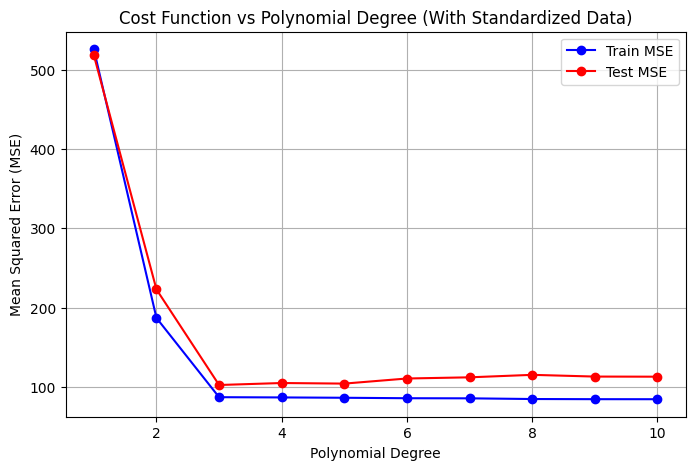

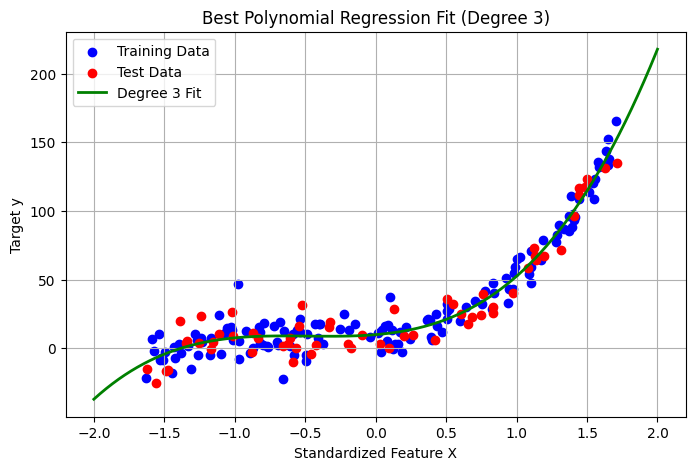

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ---- Generate Nonlinear Data ----
np.random.seed(42)
X = 5 * np.random.rand(200, 1) - 2.5  # Increased range
y = 10 + 5*X + 10*X**2 + 5*X**3 + 10 * np.random.randn(200, 1)  # Increased noise

# ---- Standardize Features ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize X (mean=0, variance=1)

# ---- Split Data (70% Train - 30% Test) ----
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ---- Loop Through Polynomial Degrees and Compute MSE ----
degrees = np.arange(1, 11)  # Degrees from 1 to 10
train_errors = []
test_errors = []

for degree in degrees:
    # Generate polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Compute Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# ---- Plot Cost Function (MSE) vs Polynomial Degree ----
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, "bo-", label="Train MSE")
plt.plot(degrees, test_errors, "ro-", label="Test MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Cost Function vs Polynomial Degree (With Standardized Data)")
plt.legend()
plt.grid()
plt.show()

# ---- Visualize the Best Polynomial Fit ----
best_degree = np.argmin(test_errors) + 1  # Find the best degree (smallest test MSE)
poly_features_best = PolynomialFeatures(degree=best_degree)
X_train_poly_best = poly_features_best.fit_transform(X_train)
X_test_poly_best = poly_features_best.transform(X_test)

# Train the best model
best_model = LinearRegression()
best_model.fit(X_train_poly_best, y_train)

# Generate predictions
X_range = np.linspace(-2, 2, 1000).reshape(-1, 1)  # Generate standardized X values for smooth curve
X_range_poly = poly_features_best.transform(X_range)
y_range_pred = best_model.predict(X_range_poly)

# Plot the best polynomial fit
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='red', label="Test Data")
plt.plot(X_range, y_range_pred, color='green', linewidth=2, label=f"Degree {best_degree} Fit")
plt.xlabel("Standardized Feature X")
plt.ylabel("Target y")
plt.title(f"Best Polynomial Regression Fit (Degree {best_degree})")
plt.legend()
plt.grid()
plt.show()


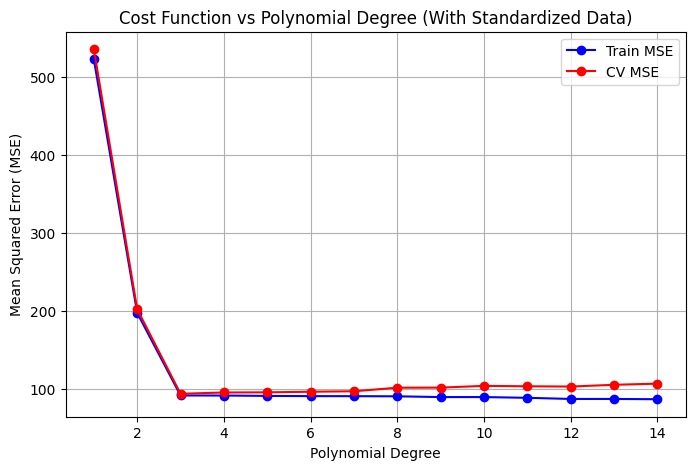

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# ---- Generate Nonlinear Data ----
np.random.seed(42)
X = 5 * np.random.rand(200, 1) - 2.5  # Increased range
y = 10 + 5*X + 10*X**2 + 5*X**3 + 10 * np.random.randn(200, 1)  # Increased noise

# ---- Standardize Features ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize X (mean=0, variance=1)

# ---- Loop Through Polynomial Degrees and Compute MSE ----
degrees = np.arange(1, 15)  # Increased degrees
train_errors = []
test_errors = []

for degree in degrees:
    # Generate polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_scaled)  # Use all scaled data for CV

    # Train the Linear Regression model and get cross-validation scores
    model = LinearRegression()
    mse_scores = -cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')  # 5-fold CV
    avg_cv_mse = np.mean(mse_scores)

    # Train the model on the full data for plotting the train error
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    train_mse = mean_squared_error(y, y_pred)

    # Store errors
    train_errors.append(train_mse)
    test_errors.append(avg_cv_mse)  # Store average CV error

# ---- Plot Cost Function (MSE) vs Polynomial Degree ----
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, "bo-", label="Train MSE")
plt.plot(degrees, test_errors, "ro-", label="CV MSE")  # Changed label to CV
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Cost Function vs Polynomial Degree (With Standardized Data)")
plt.legend()
plt.grid()
plt.show()

### Getting Additional Features

This code addresses **high bias** in a regression model by expanding the feature space with **polynomial and trigonometric transformations** to better capture nonlinear relationships. The dataset, generated from a cubic function with noise, follows: $ y = 3 + 2X - 4X^2 + 3X^3 + \epsilon, \quad \epsilon \sim N(0, 0.5) $.


To improve model expressiveness, additional features are introduced, including polynomial terms: $X^1, X^2, \dots, X^d $ and trigonometric transformations: $ \sin(i\pi X), \quad \cos(i\pi X) \quad \text{for} i = 1,2,\dots,d $ forming an expanded feature matrix:

$
X_{\text{expanded}} = \begin{bmatrix} X & X^2 & X^3 & \dots & X^d & \sin(\pi X) & \sin(2\pi X) & \dots & \sin(d\pi X) & \cos(\pi X) & \cos(2\pi X) & \dots & \cos(d\pi X) \end{bmatrix}
$

These transformations allow the model to fit complex functions, reducing bias while maintaining generalization. The dataset is standardized using **z-score normalization**: $
X' = \frac{X - \mu}{\sigma}$.

where $\mu$ is the mean and $\sigma$ is the standard deviation. A linear regression model is trained, and the Mean Squared Error (MSE) is computed for both training and cross-validation:

$ J_{\text{train}} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(X_{\text{train},i}) - y_i)^2
$

$ J_{\text{cv}} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(X_{\text{cv},i}) - y_i)^2
$

where $h_{\theta}(X)$ represents the model's prediction. The optimal feature expansion is determined by minimizing $J_{\text{cv}}$, ensuring the best tradeoff between bias and variance. Finally, the model's fit is visualized, demonstrating how increasing features improves performance while avoiding overfitting.

**⚠️ Key Takeaways:**

* ✅ Too few features ➡️ Underfitting ➡️ Both $J_{train}$ and $J_{cv}$ are high.
* ✅ Optimal features ➡️ Best Generalization ➡️ $J_{train}$ and $J_{cv}$ are both minimized.
* ✅ Too many features ➡️ Overfitting ➡️ Low $J_{train}$, High $J_{cv}$.


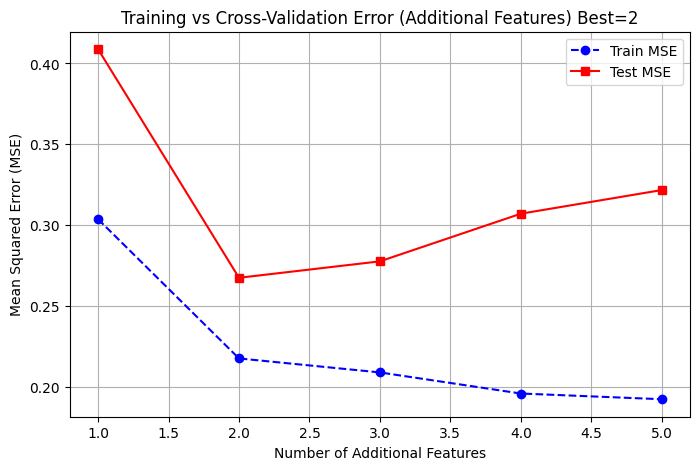

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ---- Generate Nonlinear Data ----
np.random.seed(42)
X = 2 * np.random.rand(200, 1) - 1  # 200 samples in range [-1,1]
y = 3 + 2*X - 4*X**2 + 3*X**3 + np.random.randn(200, 1) * 0.5  # Nonlinear cubic function with noise

# ---- Function to Generate Additional Features ----
def generate_features(X, num_features):
    """
    Generate additional features including polynomial terms and trigonometric functions.
    """
    feature_list = [X]  # Start with the original feature
    for i in range(1, num_features + 1):
        feature_list.append(X**i)  # Polynomial terms
        feature_list.append(np.sin(i * np.pi * X))  # Sine transformation
        feature_list.append(np.cos(i * np.pi * X))  # Cosine transformation
    return np.hstack(feature_list)

# ---- Split dataset into training (70%) and cross-validation (30%) sets ----
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- Define the range of additional features to test ----
num_features_range = np.arange(1, 6)  # Number of additional features

# ---- Store errors ----
train_errors = []
cv_errors = []

# ---- Train models for different numbers of additional features ----
for num_features in num_features_range:
    # Generate additional features
    X_train_extended = generate_features(X_train, num_features)
    X_cv_extended = generate_features(X_cv, num_features)

    # Standardize Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_extended)
    X_cv_scaled = scaler.transform(X_cv_extended)

    # Train Linear Regression Model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Compute training and cross-validation errors
    y_train_pred = model.predict(X_train_scaled)
    y_cv_pred = model.predict(X_cv_scaled)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    cv_errors.append(mean_squared_error(y_cv, y_cv_pred))

# ---- Train Best Model and Plot Predictions ----
best_num_features = num_features_range[np.argmin(cv_errors)]  # Select the best number of features
X_train_best = generate_features(X_train, best_num_features)
X_cv_best = generate_features(X_cv, best_num_features)

# Standardize best feature set
scaler_best = StandardScaler()
X_train_best_scaled = scaler_best.fit_transform(X_train_best)
X_cv_best_scaled = scaler_best.transform(X_cv_best)

# Train the best model
best_model = LinearRegression()
best_model.fit(X_train_best_scaled, y_train)

# Generate predictions
X_range = np.linspace(-1, 1, 100).reshape(-1, 1)  # Range for visualization
X_range_extended = generate_features(X_range, best_num_features)
X_range_scaled = scaler_best.transform(X_range_extended)
y_range_pred = best_model.predict(X_range_scaled)

# ---- Plot Training and Cross-Validation Errors ----
plt.figure(figsize=(8, 5))
plt.plot(num_features_range, train_errors, marker='o', linestyle='--', label="Train MSE", color='blue')
plt.plot(num_features_range, cv_errors, marker='s', linestyle='-', label="Test MSE", color='red')
plt.xlabel("Number of Additional Features")
plt.ylabel("Mean Squared Error (MSE)")
plt.title(f"Training vs Cross-Validation Error (Additional Features) Best={best_num_features}")
plt.legend()
plt.grid(True)
plt.show()


### Tuning the Regularization

This code investigates the effect of **Ridge regularization**  ($\lambda$) on a polynomial regression model by training it with different regularization strengths and evaluating its performance on training and cross-validation data. The dataset is generated with a nonlinear cubic function and significant noise, making it a good case for regularization analysis. The model applies **4th-degree polynomial feature** transformation followed by Ridge regression to control overfitting. A range of $\lambda$ values is tested, and for each, the Mean Squared Error (MSE) is computed for both training ($J_{train}$) and cross-validation ($J_{cv}$) datasets. The optimal $\lambda$ is selected as the one that minimizes ($J_{cv}$),  balancing the bias-variance tradeoff. Finally, the model trained with the best $\lambda$ is used to make predictions, and the results are visualized in two plots: one showing MSE vs. $\lambda$ and another displaying the best polynomial fit over the data. The output includes the optimal $\lambda$ value, highlighting how regularization improves generalization.

**⚠️ Key Takeaways:**


* ✅ Small $\lambda$ ➡️ Overfitting ➡️ Low $J_{train}$, High $J_{cv}$.
* ✅ Optimal $\lambda$ ➡️ Best Generalization ➡️ Balanced $J_{train}$ and $J_{cv}$.
* ✅ Large $\lambda$ ➡️ Underfitting ➡️ High $J_{train}$ and $J_{cv}$.


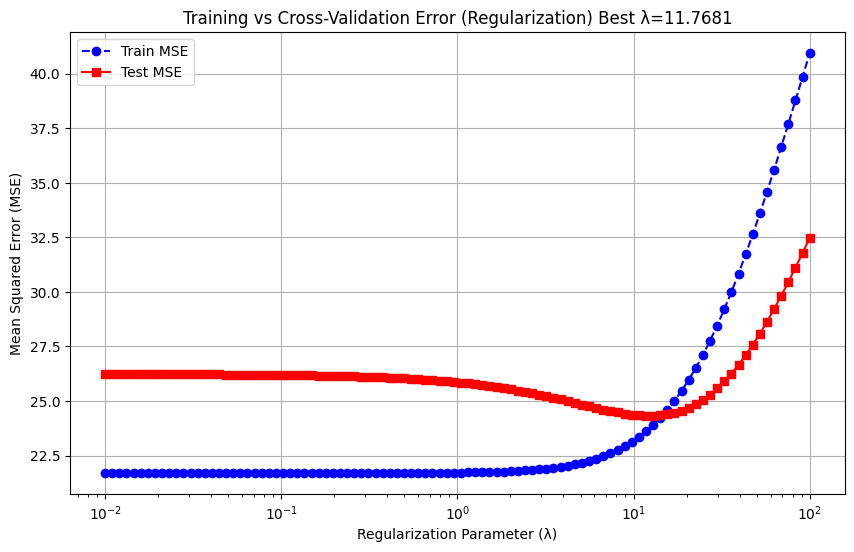

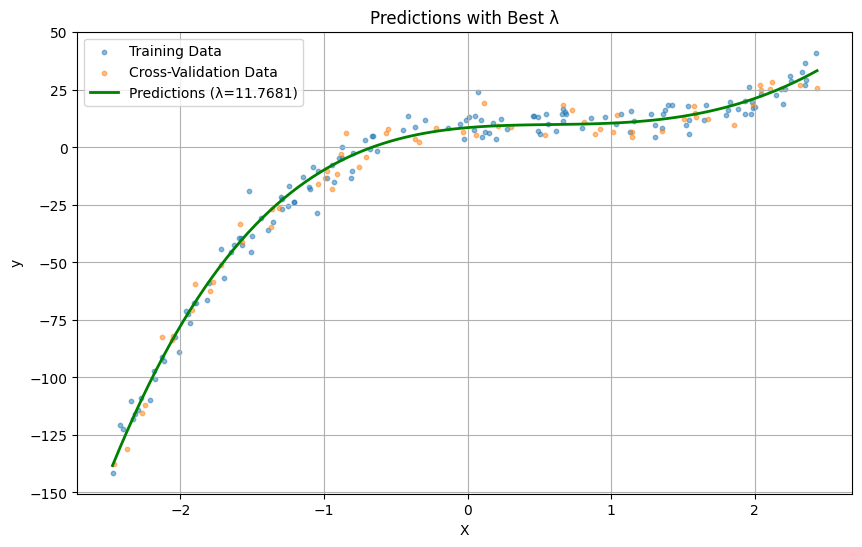

Best Lambda: 11.768119524349991


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# ---- Generate Nonlinear Data with More Noise and Complexity ----
np.random.seed(42)
X = 5 * np.random.rand(200, 1) - 2.5  # Increased range
y = 10 + 5*X - 10*X**2 + 5*X**3 + 5 * np.random.randn(200, 1) # Increased noise and coefficients

# ---- Split dataset into training (70%) and cross-validation (30%) sets ----
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- Define the range of regularization parameters (lambda) ----
lambda_range = np.logspace(-2, 2, 100)  # Range of lambda values

# ---- Store errors ----
train_errors = []
cv_errors = []

# ---- Train models for different regularization parameters ----
for lambda_val in lambda_range:
    # Create a polynomial model with Ridge regularization
    model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=lambda_val))
    model.fit(X_train, y_train)

    # Compute training and cross-validation errors
    y_train_pred = model.predict(X_train)
    y_cv_pred = model.predict(X_cv)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    cv_errors.append(mean_squared_error(y_cv, y_cv_pred))

# ---- Train Best Model and Plot Predictions ----
best_lambda = lambda_range[np.argmin(cv_errors)]  # Select the best lambda value

# ---- Train Best Model ----
best_model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=best_lambda))
best_model.fit(X_train, y_train)

# Generate predictions for plotting
X_range = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
y_range_pred = best_model.predict(X_range)

# ---- Plot Training and Cross-Validation Errors vs. Lambda ----
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_range, train_errors, marker='o', linestyle='--', label="Train MSE", color='blue')
plt.semilogx(lambda_range, cv_errors, marker='s', linestyle='-', label="Test MSE", color='red')
plt.xlabel("Regularization Parameter (\u03BB)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title(f"Training vs Cross-Validation Error (Regularization) Best \u03BB={best_lambda:.4f}")
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Predictions ----
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, s=10, alpha=0.5, label="Training Data")
plt.scatter(X_cv, y_cv, s=10, alpha=0.5, label="Cross-Validation Data")
plt.plot(X_range, y_range_pred, color='green', linewidth=2, label=f"Predictions (\u03BB={best_lambda:.4f})")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Predictions with Best \u03BB")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Lambda: {best_lambda}")

### Increasing Training Set Size

This code investigates the bias-variance tradeoff by varying the sample size while fitting a polynomial regression model (degree = 5) to a smooth nonlinear dataset. Unlike using randomly sampled data, the input feature X is evenly spaced in the range [-5, 5], ensuring better polynomial coverage. The target variable y follows a cubic polynomial function with a small sinusoidal variation instead of random noise, allowing for smooth function approximation. The dataset is standardized, split into training and test sets (70%-30%), and transformed using polynomial features before training a linear regression model. The mean squared error (MSE) is computed for both training and test sets across different sample sizes (1000 to 10,000). The results show that as the sample size increases, train and test MSE remain stable (~1.79 and ~1.77, respectively), indicating a well-balanced bias-variance tradeoff with no overfitting or underfitting. The approach ensures smooth learning curves, avoids unnecessary randomness, and provides a clear analysis of how sample size affects model performance.

Sample Size: 1000, Train MSE: 42.462, Test MSE: 39.431
Sample Size: 2000, Train MSE: 42.192, Test MSE: 39.715
Sample Size: 3000, Train MSE: 41.270, Test MSE: 41.654
Sample Size: 4000, Train MSE: 41.120, Test MSE: 42.052
Sample Size: 5000, Train MSE: 41.621, Test MSE: 40.844
Sample Size: 6000, Train MSE: 41.408, Test MSE: 41.351
Sample Size: 7000, Train MSE: 41.355, Test MSE: 41.462
Sample Size: 8000, Train MSE: 41.679, Test MSE: 40.742
Sample Size: 9000, Train MSE: 41.863, Test MSE: 40.290
Sample Size: 10000, Train MSE: 41.607, Test MSE: 40.886


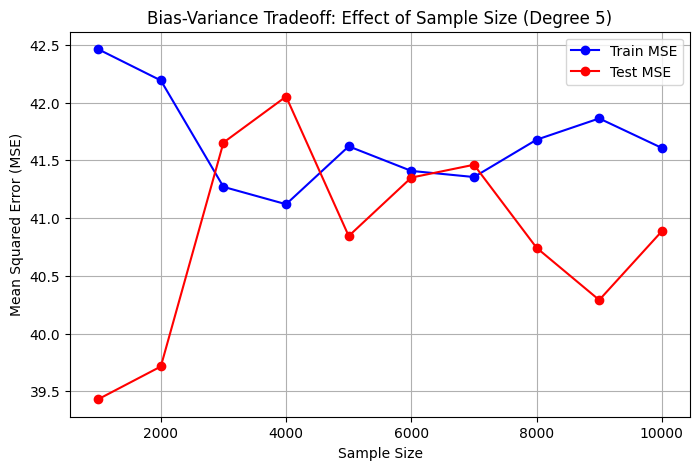

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ---- Function to Investigate Bias-Variance Tradeoff by Varying Sample Size ----
def investigate_bias_variance_tradeoff(sample_sizes, polynomial_degree=5):
    train_mse_list = []
    test_mse_list = []

    for sample_size in sample_sizes:
        sample_size = int(sample_size)  # Ensure integer sample size

        # ---- Generate Smooth X and y ----
        np.random.seed(42)

        # Use evenly spaced X values for better polynomial coverage
        X = np.linspace(-5, 5, sample_size).reshape(-1, 1)

        # Define a smooth function without excessive noise
        y_true = 10 + 5*X + 10*X**2 + 5*X**3  # True polynomial function
        y = y_true + 10 * np.sin(2 * X)  # Adding a small sinusoidal component instead of random noise

        # ---- Standardize Features ----
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # ---- Split Data (70% Train - 30% Test) ----
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

        # ---- Generate Polynomial Features ----
        poly = PolynomialFeatures(degree=polynomial_degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # ---- Train the Polynomial Regression Model ----
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # ---- Predictions ----
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        # ---- Compute Mean Squared Error (MSE) ----
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        # Store errors
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)

        print(f"Sample Size: {sample_size}, Train MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")

    # ---- Plot MSE vs Sample Size ----
    plt.figure(figsize=(8, 5))
    plt.plot(sample_sizes, train_mse_list, "bo-", label="Train MSE")
    plt.plot(sample_sizes, test_mse_list, "ro-", label="Test MSE")
    plt.xlabel("Sample Size")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title(f"Bias-Variance Tradeoff: Effect of Sample Size (Degree {polynomial_degree})")
    plt.legend()
    plt.grid()
    plt.show()

# ---- Investigate with Large Sample Sizes ----
sample_sizes = np.linspace(1000, 10000, num=10, dtype=int)  # Ensure integer sample sizes

investigate_bias_variance_tradeoff(sample_sizes, polynomial_degree=5)  # Use polynomial regression (degree=3)
